In [15]:
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor
import json
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
import re
import pygal as pg
from IPython.display import SVG

consumer_key="Gj2Jom5yJ83X3xKfKowbFyhK2"
consumer_secret="2HctlBNAsMG3mkDHm6tKcC0740jqdwHh9g2IVfrLxXT10ilQZo"
access_token="136011868-rM8MaIryZjsLRL7epoWC1hy7iixG5lej4LN5wICA"
access_token_secret="I9VbyWKe9drnYeOwNTG91aQPe8oJKQxivWwGC28I62OwK"

MAX_TWEETS = 100

# This handles Twitter authentication and the connection to Twitter Streaming API
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = API(auth, wait_on_rate_limit=True)

data = Cursor(api.search, q='amazon.com').items(MAX_TWEETS)
mozsprint_data = []
# You will use this line in production instead of this
# current_working_dir = os.path.dirname(os.path.realpath(__file__))
current_working_dir = "./"
log_tweets = current_working_dir + 'twittersdataurls.json'
count=0
with open(log_tweets, 'w') as outfile:
    for tweet in data:
        mozsprint_data.append(json.loads(json.dumps(tweet._json)))
        outfile.write(json.dumps(tweet._json))
        outfile.write("\n")
        count=count+1
print(len(mozsprint_data))

# Create the dataframe we will use
tweets = pd.DataFrame()
# We want to know when a tweet was sent
tweets['created_at'] = list(map(
    lambda tweet: time.strftime('%Y-%m-%d %H:%M', time.strptime(tweet['created_at'], '%a %b %d %H:%M:%S +0000 %Y')),
    mozsprint_data))
# Who is the tweet owner
tweets['user'] = list(map(lambda tweet: tweet['user']['screen_name'], mozsprint_data))
# How many follower this user has+

tweets['user_followers_count'] = list(map(lambda tweet: tweet['user']['followers_count'], mozsprint_data))
tweets['text'] = list(map(lambda tweet: tweet['text'], mozsprint_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], mozsprint_data))
tweets['Location'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, mozsprint_data))
tweets['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], mozsprint_data))
tweets['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], mozsprint_data))
tweets['coordinates'] = list(map(lambda tweet: tweet['coordinates'] if tweet['place'] != None else None, mozsprint_data))
tweets['screen_name'] = list(map(lambda tweet: tweet['user']['screen_name'], mozsprint_data))
tweets['profile_image_url'] = list(map(lambda tweet: tweet['user']['profile_image_url'], mozsprint_data))
tweets['followers_count'] = list(map(lambda tweet: tweet['user']['followers_count'], mozsprint_data))
tweets['source'] = list(map(lambda tweet: tweet['source'], mozsprint_data))
tweets['url'] = list(map(lambda tweet: tweet['user']['url'], mozsprint_data))
tweets['local_lang'] = list(map(lambda tweet: tweet['metadata']['iso_language_code'], mozsprint_data))
#print(tweets['coordinates'])

#print(tweets.head())
#print (tweets.head())
#print(max(tweets['retweet_count']))
#print(np.argsort(tweets['retweet_count'],order='a')[::-1][:5])
# for index in tweets['text']:
##print(index)
def plot_tweets_per_category(category, title, x_title, y_title, top_n=5, output_filename="plot.png"):
    tweets_by_cat = category.value_counts()
    fig, ax = plt.subplots()
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    ax.set_title(title)
    tweets_by_cat[:top_n].plot(ax=ax, kind='line')
    fig.savefig(output_filename)
    fig.show()

created_at = pd.DataFrame(tweets['created_at'].value_counts())
#print(created_at[:5])

plot_tweets_per_category(tweets['created_at'],
                         "",
                         "Timeline",
                         "Number of Tweets",
                         1000,
                         "Timeline.png")


name_profile = pd.DataFrame([tweets['screen_name'],tweets['profile_image_url'],tweets['followers_count']])
#print(name_profile[:5])

total_retweets=pd.DataFrame(tweets['retweet_count'])
total_favourites=pd.DataFrame(tweets['favorite_count'])
t_retweets = total_retweets.sum()
t_favourites = total_favourites.sum()
print((int(t_favourites)+int(t_retweets)))

print(len(tweets['screen_name'].unique()))
max_retweet = pd.DataFrame([tweets['screen_name'],tweets['profile_image_url'],tweets['retweet_count'],tweets['text'],tweets['url']])
#print(max_retweet.describe())
#max_retweet.sort(int(['retweet_count']),ascending=False)
#print(max_retweet[:5])



top_sites = pd.DataFrame(tweets['source'].value_counts())
#print(top_sites[:5])

location = pd.DataFrame(tweets['Location'].value_counts())
#print(location[:5])

language = pd.DataFrame(tweets['lang'].value_counts())
#print(language[:5])

local_lang = pd.DataFrame(tweets['local_lang'].value_counts())
#print(local_lang[:5])

# location_coordinates = pd.DataFrame(tweets['Location'],tweets['coordinates'])
#print(location_coordinates[:5])




# df = pd.DataFrame(tweets['created_at'], columns=['number_tweets'])
# # df['date'] = df.index
# print(df.index)
# print(df.head())

100
1040
74


C:\Users\dhineshvikram\Anaconda3\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [3]:
print("user")
print(len(tweets['user'].unique()))
print("\n")

print("posts")
print(len(tweets['text'].unique()))
print("\n")

print("impression")
impression = tweets['retweet_count'].sum()+tweets['favorite_count'].sum()
print(impression)
print("\n")

print("user")
tweets['created_at'].value_counts()
print("\n")

print("Sort by RT/Likes")
sort_by_retweet = (tweets.sort_values(['retweet_count'], ascending=[0])).loc[: 10,['text','created_at','screen_name','retweet_count']]
print(sort_by_retweet[:10])
print("\n")

print("Sort by RT/Likes")
sort_by_latest = (tweets.sort_values(['created_at'], ascending=[0])).loc[: 10,['text','created_at','screen_name','retweet_count']]
print(sort_by_latest[:10])
print("\n")

print("Engaged User")
engagement_users = (tweets.sort_values(['followers_count'], ascending=[0])).loc[:10,['user','profile_image_url']]
print(engagement_users[:10])
print("\n")

print("Frequency User")
print(tweets['user'].value_counts())
print

print("Most Recent User")
engagement_users = (tweets.sort_values(['created_at'], ascending=[0])).loc[:10,['user','profile_image_url']]
print(engagement_users[:10])
print("\n")



user
657


posts
896


impression
45805


user


Sort by RT/Likes
                                                  text        created_at  \
194  RT @videogamedeals: Follow &amp; RT For a Chan...  2017-04-12 05:49   
641  RT @MalcolmNance: READ: My Spy Thriller-paced ...  2017-04-12 05:43   
305  RT @olkonol_oa: How to diagnose organisational...  2017-04-12 05:48   
937  RT @MJLaBeff: Celebrating the release of Last ...  2017-04-12 05:39   
245  RT @Nblackthorne: "Erotically primal &amp; int...  2017-04-12 05:48   
284  RT @AdvertAvenue: #Win a Galaxy S8 Pre-order! ...  2017-04-12 05:48   
176  RT @aksysgames: Follow &amp; retweet for a cha...  2017-04-12 05:50   
126  RT @aksysgames: Follow &amp; retweet for a cha...  2017-04-12 05:50   
117  RT @AdvertAvenue: #Win a pair of Beats Solo 3 ...  2017-04-12 05:50   
47   RT @AdvertAvenue: #Win a pair of Beats Solo 3 ...  2017-04-12 05:51   

         screen_name  retweet_count  
194       temera1kga           7722  
641        louskitty 

In [4]:
print("By Location")
print(tweets['Location'].value_counts())
print("\n")

print("By Language")
print(tweets['lang'].value_counts())
print("\n")


By Location
United States     5
Pakistan          1
United Kingdom    1
Name: Location, dtype: int64


By Language
en     917
und     35
es      14
fr      10
ja       4
pt       4
in       3
cy       3
et       2
de       2
ht       2
pl       1
it       1
ar       1
da       1
Name: lang, dtype: int64




C:\Users\dhineshvikram\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


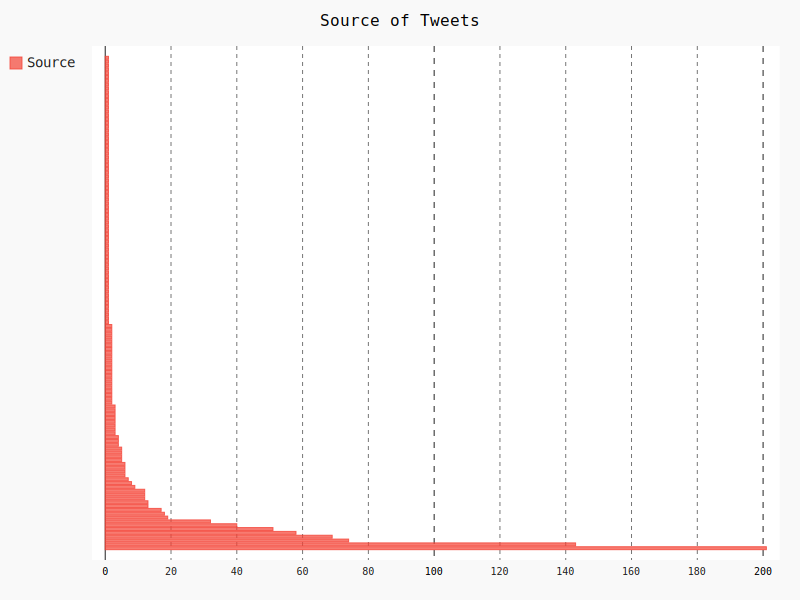

In [5]:
index=0
for source in tweets['source']:
    tweets['source'][index] = re.sub('<[^>]*>', '', source)
    index=index+1
    
twitter_source_freq = tweets['source'].value_counts()

tweets['source'].value_counts()

line_chart = pg.HorizontalBar()
line_chart.title = 'Source of Tweets'

df_new=pd.DataFrame(tweets['source'].value_counts())
line_chart.add('Source',df_new['source'])

SVG(line_chart.render())

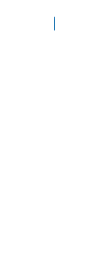

In [5]:
tweets['hashtags'] = list(map(lambda tweet: tweet['entities']['hashtags'][0]['text'] if(tweet['entities']['hashtags']) else "Awesome", mozsprint_data))
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = "".join(str(x) for x in tweets['hashtags'] if x!='None')
no_urls_no_tags = " ".join([word for word in text.split()
                            if 'http' not in word
                            and not word.startswith('@')
                            and word != 'None'
                            ])
wc = WordCloud(background_color="white", stopwords=STOPWORDS, width=1500,
               height=1500)
wc.generate(no_urls_no_tags)
plt.imshow(wc)
plt.axis("off")
plt.show()

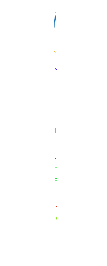

In [6]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = "test".join(str(x) for x in tweets['text'])

no_urls_no_tags = " ".join([word for word in text.split()
                            if 'http' not in word
                            and not word.startswith('@')
                            and word != 'RT'
                            ])
wc = WordCloud(background_color="white", stopwords=STOPWORDS, width=1800,
               height=1400)
wc.generate(no_urls_no_tags)
plt.imshow(wc)
plt.axis("off")
plt.savefig('mozsprint.png')
plt.show()

In [7]:
tweets['urls'] = list(map(lambda tweet: tweet['entities']['urls'][0]['expanded_url'] if(tweet['entities']['urls']) else None , mozsprint_data))
tweets['urls']
# index=0
# for urls in tweets['urls']:
#     if tweets['urls'][index] !='None':
#         tweets['urls'][index] = re.sub('<[^>]*>', '', urls)
#         index=index+1
    
# twitter_source_freq = tweets['urls'].value_counts()

tweets['urls'].value_counts()

https://www.amazon.com/dp/B06Y4DWT78/ref=cm_sw_r_sms_apa_U7B7ybWBDGBKK                                                                          13
http://smarturl.it/PFOPtg                                                                                                                       10
https://giveaway.amazon.com/p/2e1e4bc3b6c027e5/?ref_=tsm_4_tw_p_tw                                                                              10
http://a.co/2pdHAjF                                                                                                                              8
http://www.amazon.com/Star-Annie-Hearts-Gold-Book-ebook/dp/B00VDRUNZG/ref=sr_1_6?s=digital-text&ie=UT                                            8
http://smarturl.it/CALtg                                                                                                                         7
http://www.amazon.com/Novel-Obsession-Book-ebook/dp/B00AH0WRVI/ref=sr_1_3                                             

In [16]:
tweets['photo_url'] = list(map(lambda tweet: tweet['extended_entities']['media'][0]['media_url'] if 'extended_entities' in tweet else None, mozsprint_data))
tweets['type'] = list(map(lambda tweet: tweet['extended_entities']['media'][0]['type'] if 'extended_entities' in tweet else None, mozsprint_data))
tweets['expanded_url'] = list(map(lambda tweet: tweet['extended_entities']['media'][0]['expanded_url'] if 'extended_entities' in tweet else None, mozsprint_data))
print('Photos')
photos=(tweets.loc[tweets['type'] == 'photo']).loc[:,['media_url','type']]
print(photos)
print('\n')
print('Videos')
video=(tweets.loc[tweets['type'] == 'video']).loc[:,['media_url','type','expanded_url']]
print(video)

Photos
    media_url   type
1         NaN  photo
2         NaN  photo
3         NaN  photo
13        NaN  photo
34        NaN  photo
39        NaN  photo
40        NaN  photo
41        NaN  photo
42        NaN  photo
43        NaN  photo
49        NaN  photo
51        NaN  photo
52        NaN  photo
55        NaN  photo
56        NaN  photo
59        NaN  photo
62        NaN  photo
65        NaN  photo
66        NaN  photo
67        NaN  photo
69        NaN  photo
70        NaN  photo
74        NaN  photo
86        NaN  photo
94        NaN  photo
95        NaN  photo
96        NaN  photo
98        NaN  photo


Videos
Empty DataFrame
Columns: [media_url, type, expanded_url]
Index: []
